In [1]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import PIL as pil
import os

In [2]:
from utils.preprocess import preprocess_image

In [3]:
datapath = os.path.join(os.getcwd(), "Datasets", "Raw_Images")
data =  os.listdir(datapath)
data = [os.path.join(datapath, images) for images in data]
print(data[4])
len(data)

c:\Users\harsh\OneDrive\Desktop\digantara\Datasets\Raw_Images\Raw_Observation_005_Set1.tiff


35

(np.float64(-0.5), np.float64(4417.5), np.float64(4417.5), np.float64(-0.5))

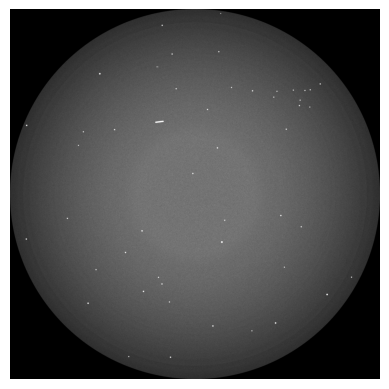

In [4]:
img = preprocess_image(data[4])[0][0]
plt.imshow(img, cmap='gray')
plt.axis('off')

In [5]:
print(img.shape)
print(img.dtype)

torch.Size([4418, 4418])
torch.float32


In [6]:
img_arr =  img.numpy()
img_arr = img_arr.astype(np.uint8)

In [7]:
print(img_arr.shape)
print(img_arr.dtype)

(4418, 4418)
uint8


In [8]:
img_arr.max()

np.uint8(1)

In [9]:
img_arr = img_arr * 255

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(np.float64(-0.5), np.float64(4417.5), np.float64(4417.5), np.float64(-0.5))

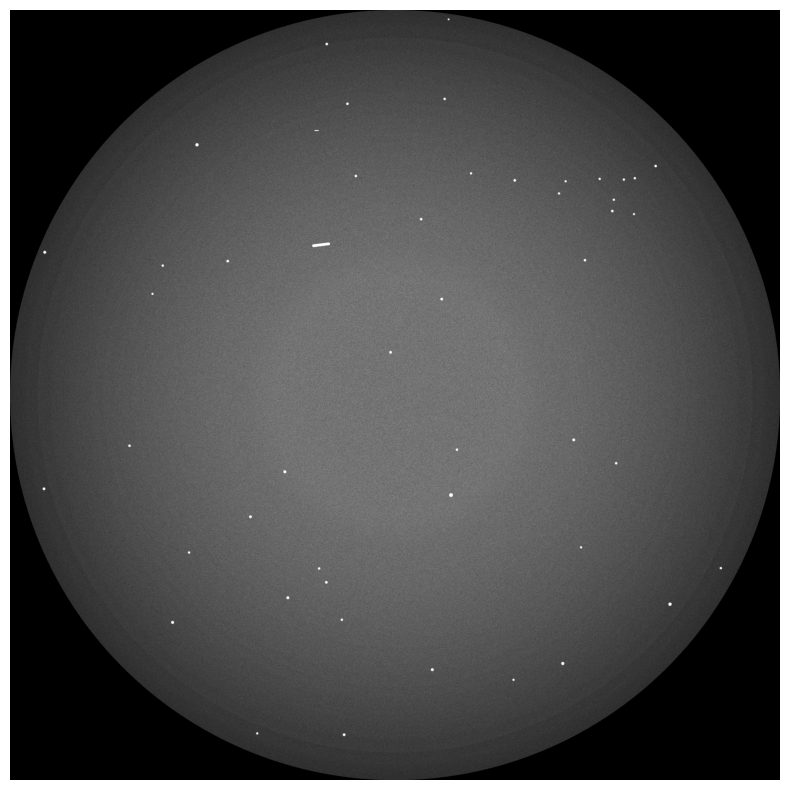

In [10]:
print(img_arr)
plt.figure(figsize= (10,10))
plt.imshow(img, cmap='gray')
plt.axis('off')

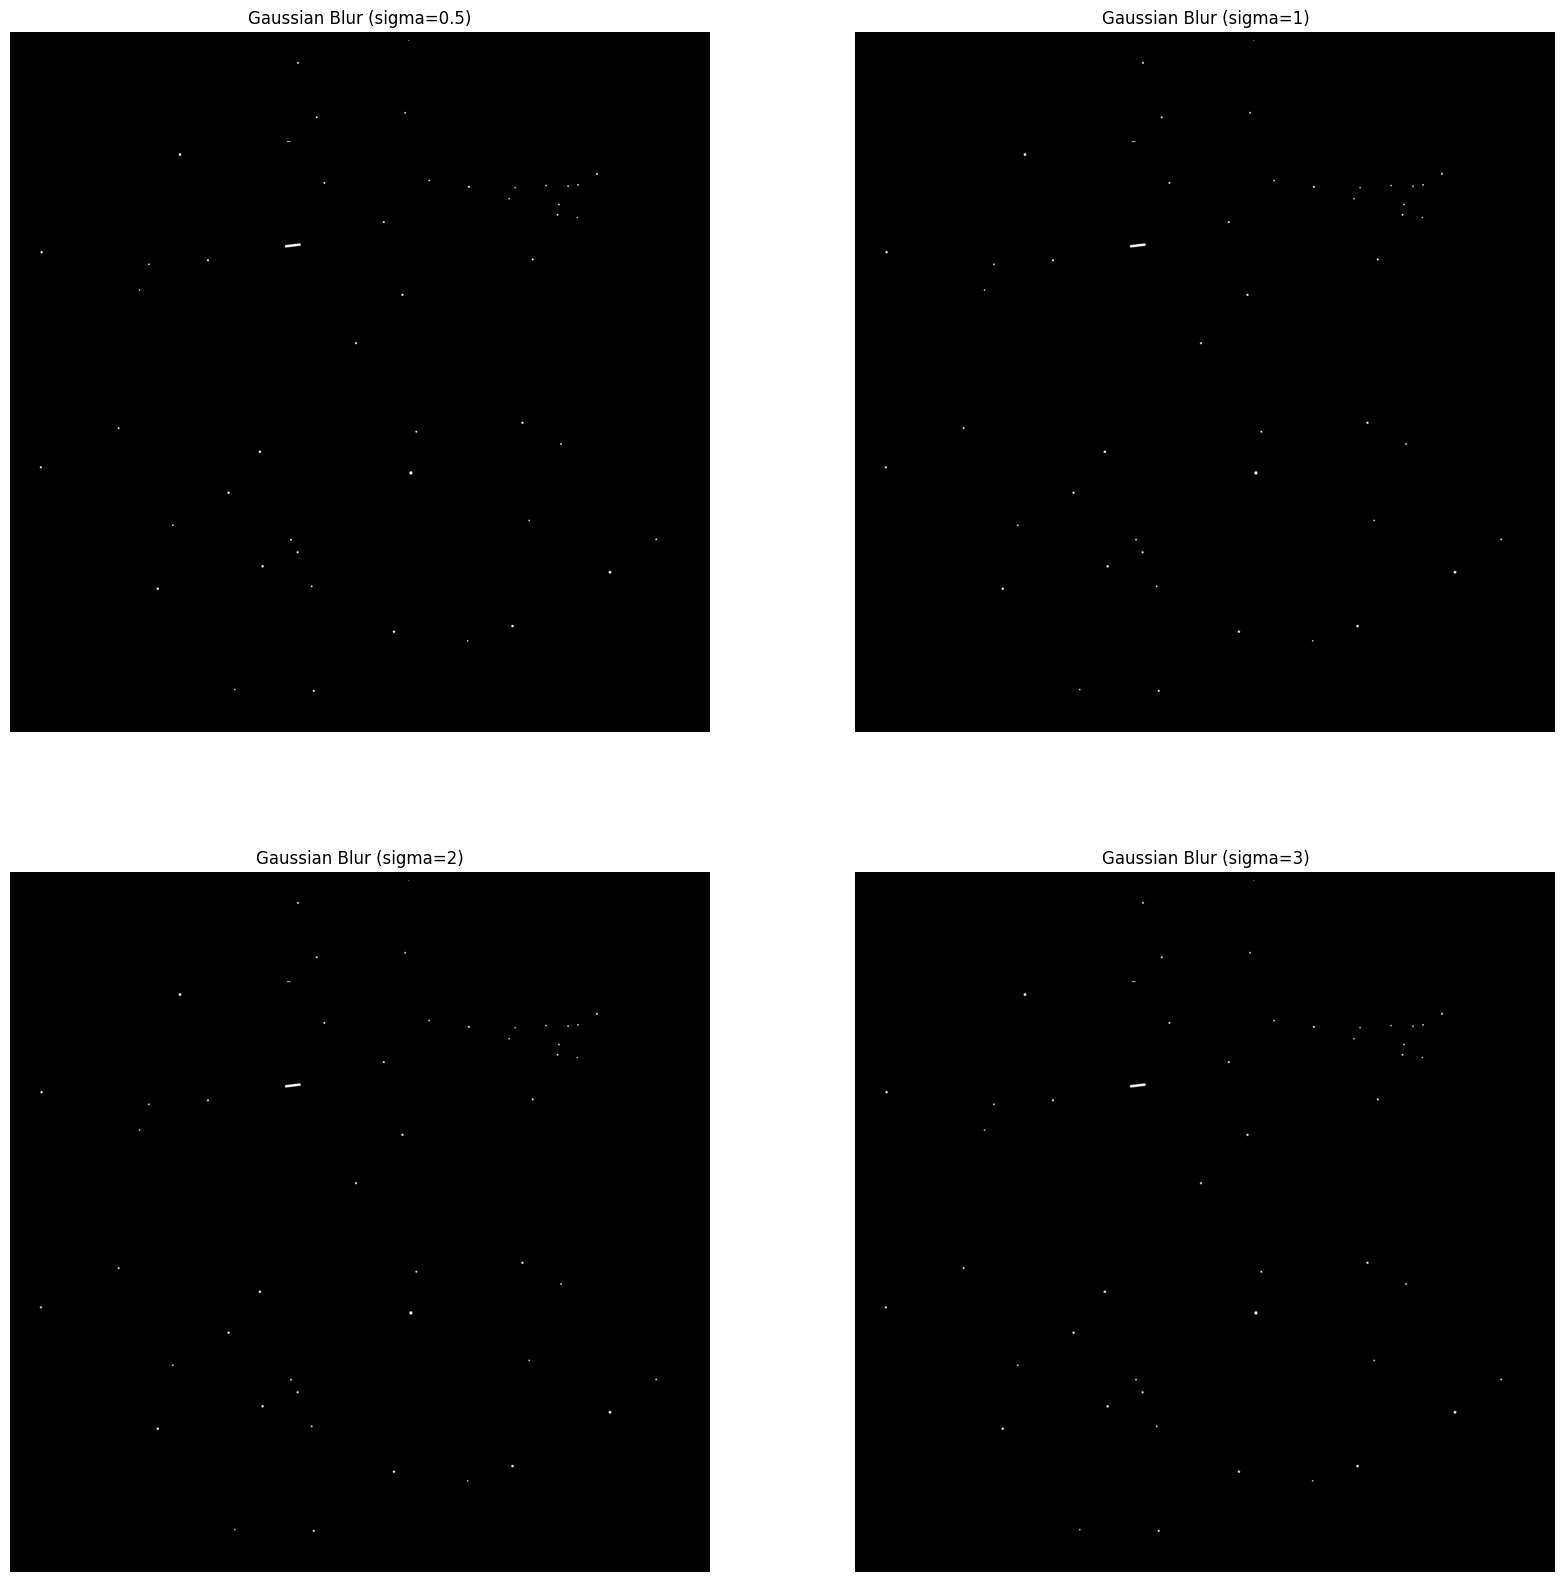

In [11]:
# Gaussian blur 
plt.figure(figsize=(20,20))

for idx, sigma in enumerate([0.5, 1, 2, 3]):
    blurred = cv.GaussianBlur(img_arr, (5,5), sigma)

    plt.subplot(2, 2, idx + 1)
    plt.title(f"Gaussian Blur (sigma={sigma})")
    plt.imshow(blurred, cmap='gray')
    plt.axis('off')

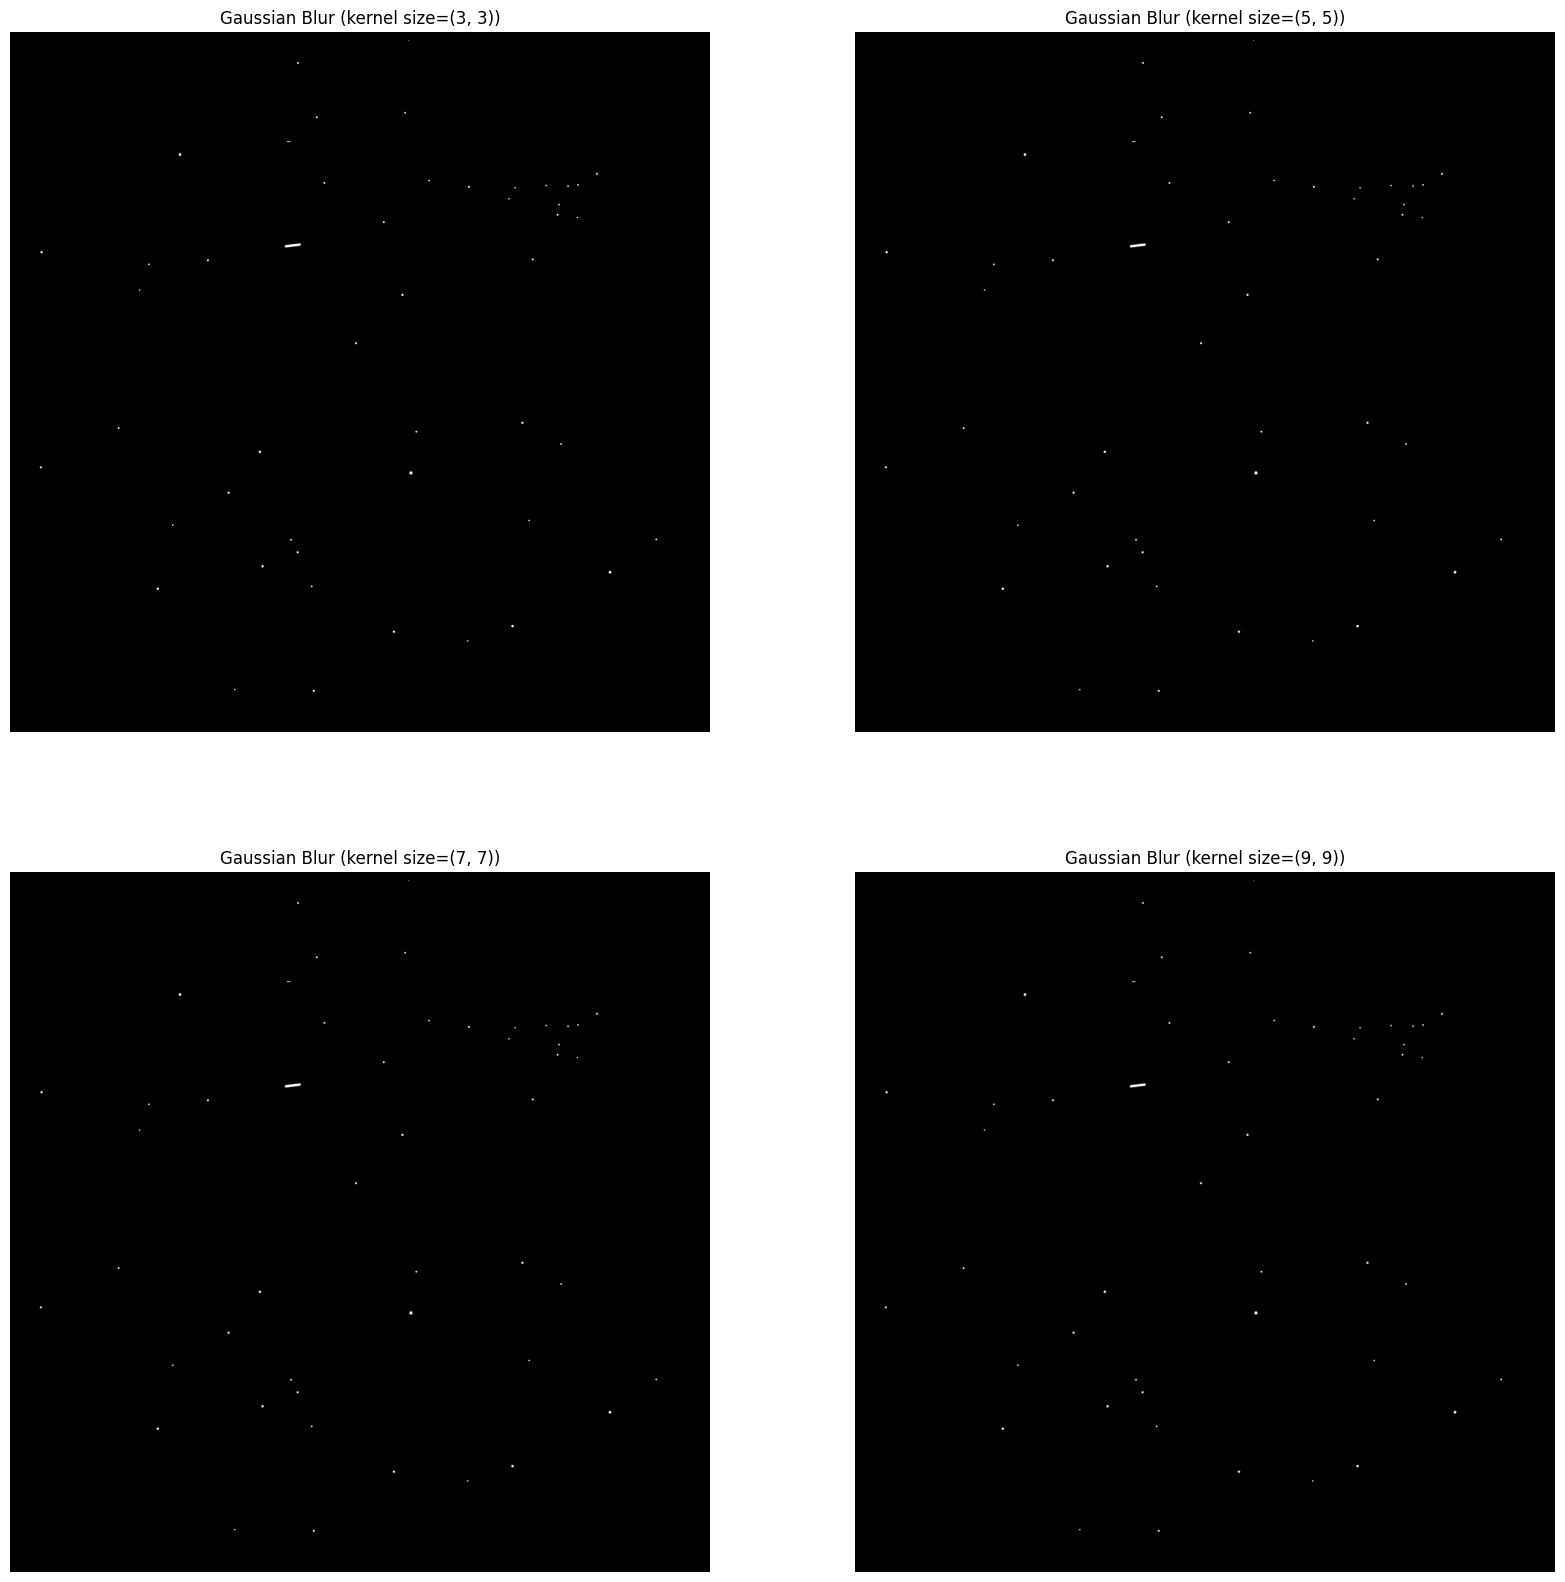

In [12]:
# Gaussian blur wioth diff kernel size
plt.figure(figsize=(20, 20))
for idx, kernel_size in enumerate([(3, 3), (5, 5), (7, 7), (9, 9)]):
    blurred = cv.GaussianBlur(img_arr, kernel_size, 0)

    plt.subplot(2, 2, idx + 1)
    plt.title(f"Gaussian Blur (kernel size={kernel_size})")
    plt.imshow(blurred, cmap='gray')
    plt.axis('off')

Text(0.5, 1.0, 'Gaussian Blur with kernel size (3,3) and sigma 0.5')

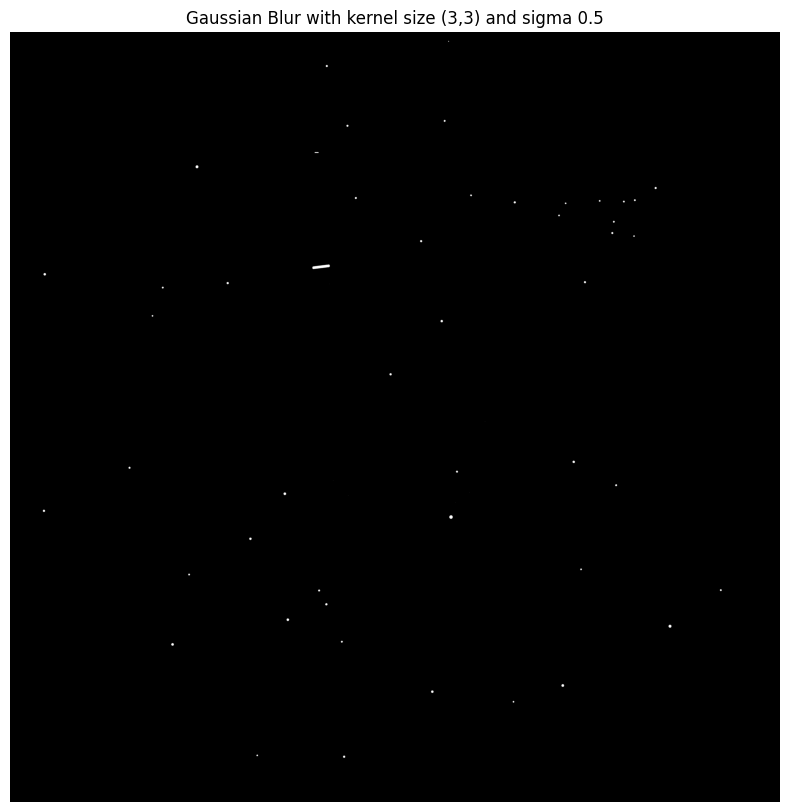

In [13]:
# Guassian blur 
blurred = cv.GaussianBlur(img_arr, (3,3), 0.5)
plt.figure(figsize=(10,10 ))
plt.imshow(blurred, cmap = "gray")
plt.axis('off')
plt.title("Gaussian Blur with kernel size (3,3) and sigma 0.5")

In [24]:
# blob detection for  detections for stars 
params =  cv.SimpleBlobDetector_Params()

params.minThreshold = 5
params.maxThreshold = 255


params.filterByColor = True
params.blobColor = 255


params.filterByArea = True
params.minArea = 2      
params.maxArea = 8000    


params.filterByInertia = False
# params.minInertiaRatio = 0.05  
# params.maxInertiaRatio = 1.0  


params.filterByCircularity = True
params.minCircularity = 0.7
params.maxCircularity = 1

params.filterByConvexity = False

detector  = cv.SimpleBlobDetector_create(params)

stars  = detector.detect(blurred)
img_with_keypoints = cv.drawKeypoints(blurred, stars, np.array([]), (255, 255, 0),
                                        cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


len(stars)

53

(np.float64(-0.5), np.float64(4417.5), np.float64(4417.5), np.float64(-0.5))

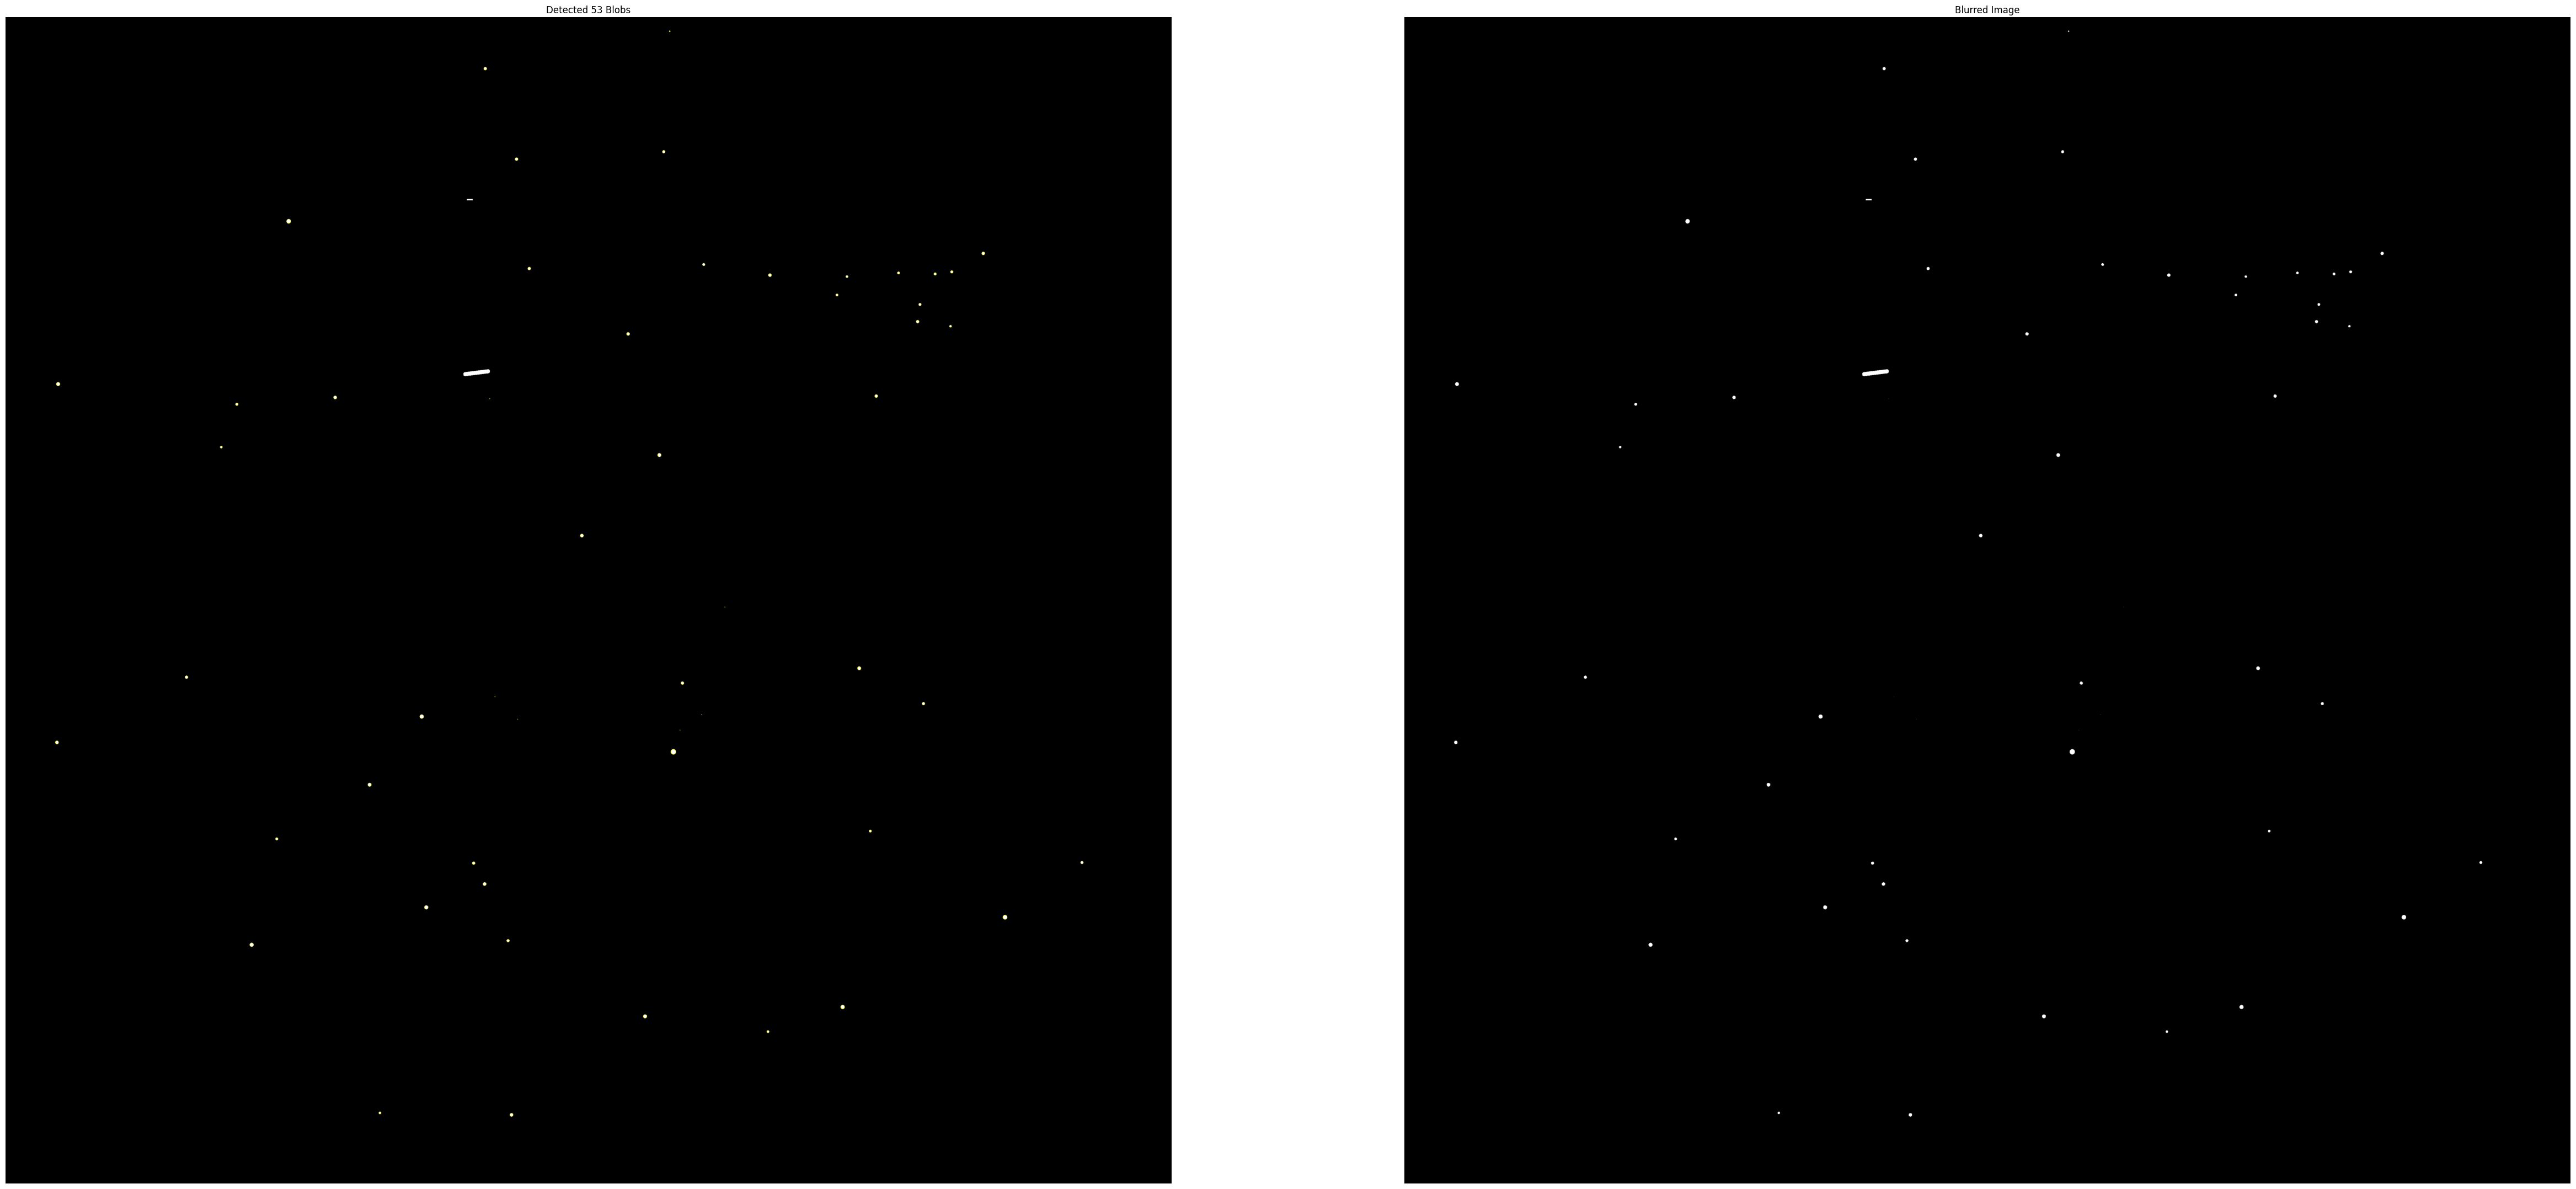

In [26]:
plt.figure(figsize=(60,30))
plt.subplot(1, 2, 1)
plt.imshow(img_with_keypoints, cmap='gray')
plt.title(f"Detected {len(stars)} Blobs")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred, cmap='gray')
plt.title("Blurred Image")
plt.axis('off')

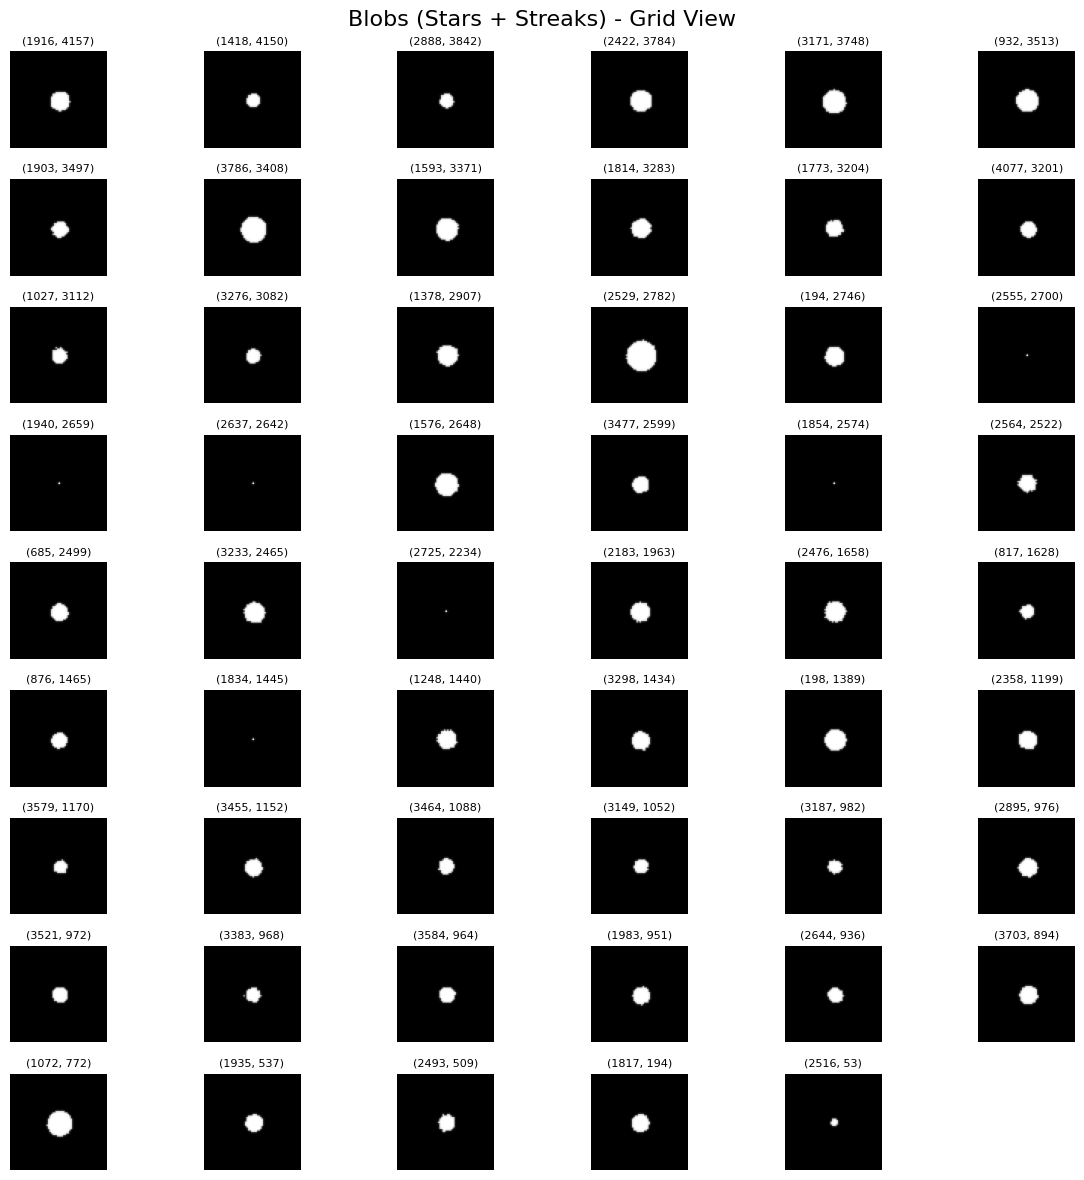

In [ ]:
# visualizing star blobs 
PATCH_SIZE = 64
patches = []
centers  = []
img = blurred
for kp in stars:
    x, y = int(kp.pt[0]), int(kp.pt[1])
    half = PATCH_SIZE // 2

    # Boundary check
    if y - half < 0 or y + half > img.shape[0] or x - half < 0 or x + half > img.shape[1]:
        continue

    patch = img[y - half:y + half, x - half:x + half]
    patches.append(patch)
    centers.append((x, y))

# Show in grid
n = len(patches) 
cols = min(6, n)
rows = int(np.ceil(n / cols))

plt.figure(figsize=(12, 12))
for i in range(n):
    plt.subplot(rows, cols, i + 1)
    plt.title(f"({centers[i][0]}, {centers[i][1]})", fontsize=8)
    plt.imshow(patches[i], cmap='gray')
    plt.axis('off')
plt.suptitle("Blobs (Stars + Streaks) - Grid View", fontsize=16)
plt.tight_layout()
plt.show()

In [36]:
# blob detection for  detections for streaks
params =  cv.SimpleBlobDetector_Params()

params.minThreshold = 5
params.maxThreshold = 255


params.filterByColor = True
params.blobColor = 255


params.filterByArea = True
params.minArea = 2      
params.maxArea = 8000    


params.filterByInertia = True
params.minInertiaRatio = 0.00001
params.maxInertiaRatio = 0.5


params.filterByCircularity = True
params.minCircularity = 0.001
params.maxCircularity = 0.7

params.filterByConvexity = False

detector  = cv.SimpleBlobDetector_create(params)

streaks  = detector.detect(blurred)
img_with_keypoints = cv.drawKeypoints(blurred, streaks, np.array([]), (255, 255, 0),
                                        cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


len(streaks)

2

(np.float64(-0.5), np.float64(4417.5), np.float64(4417.5), np.float64(-0.5))

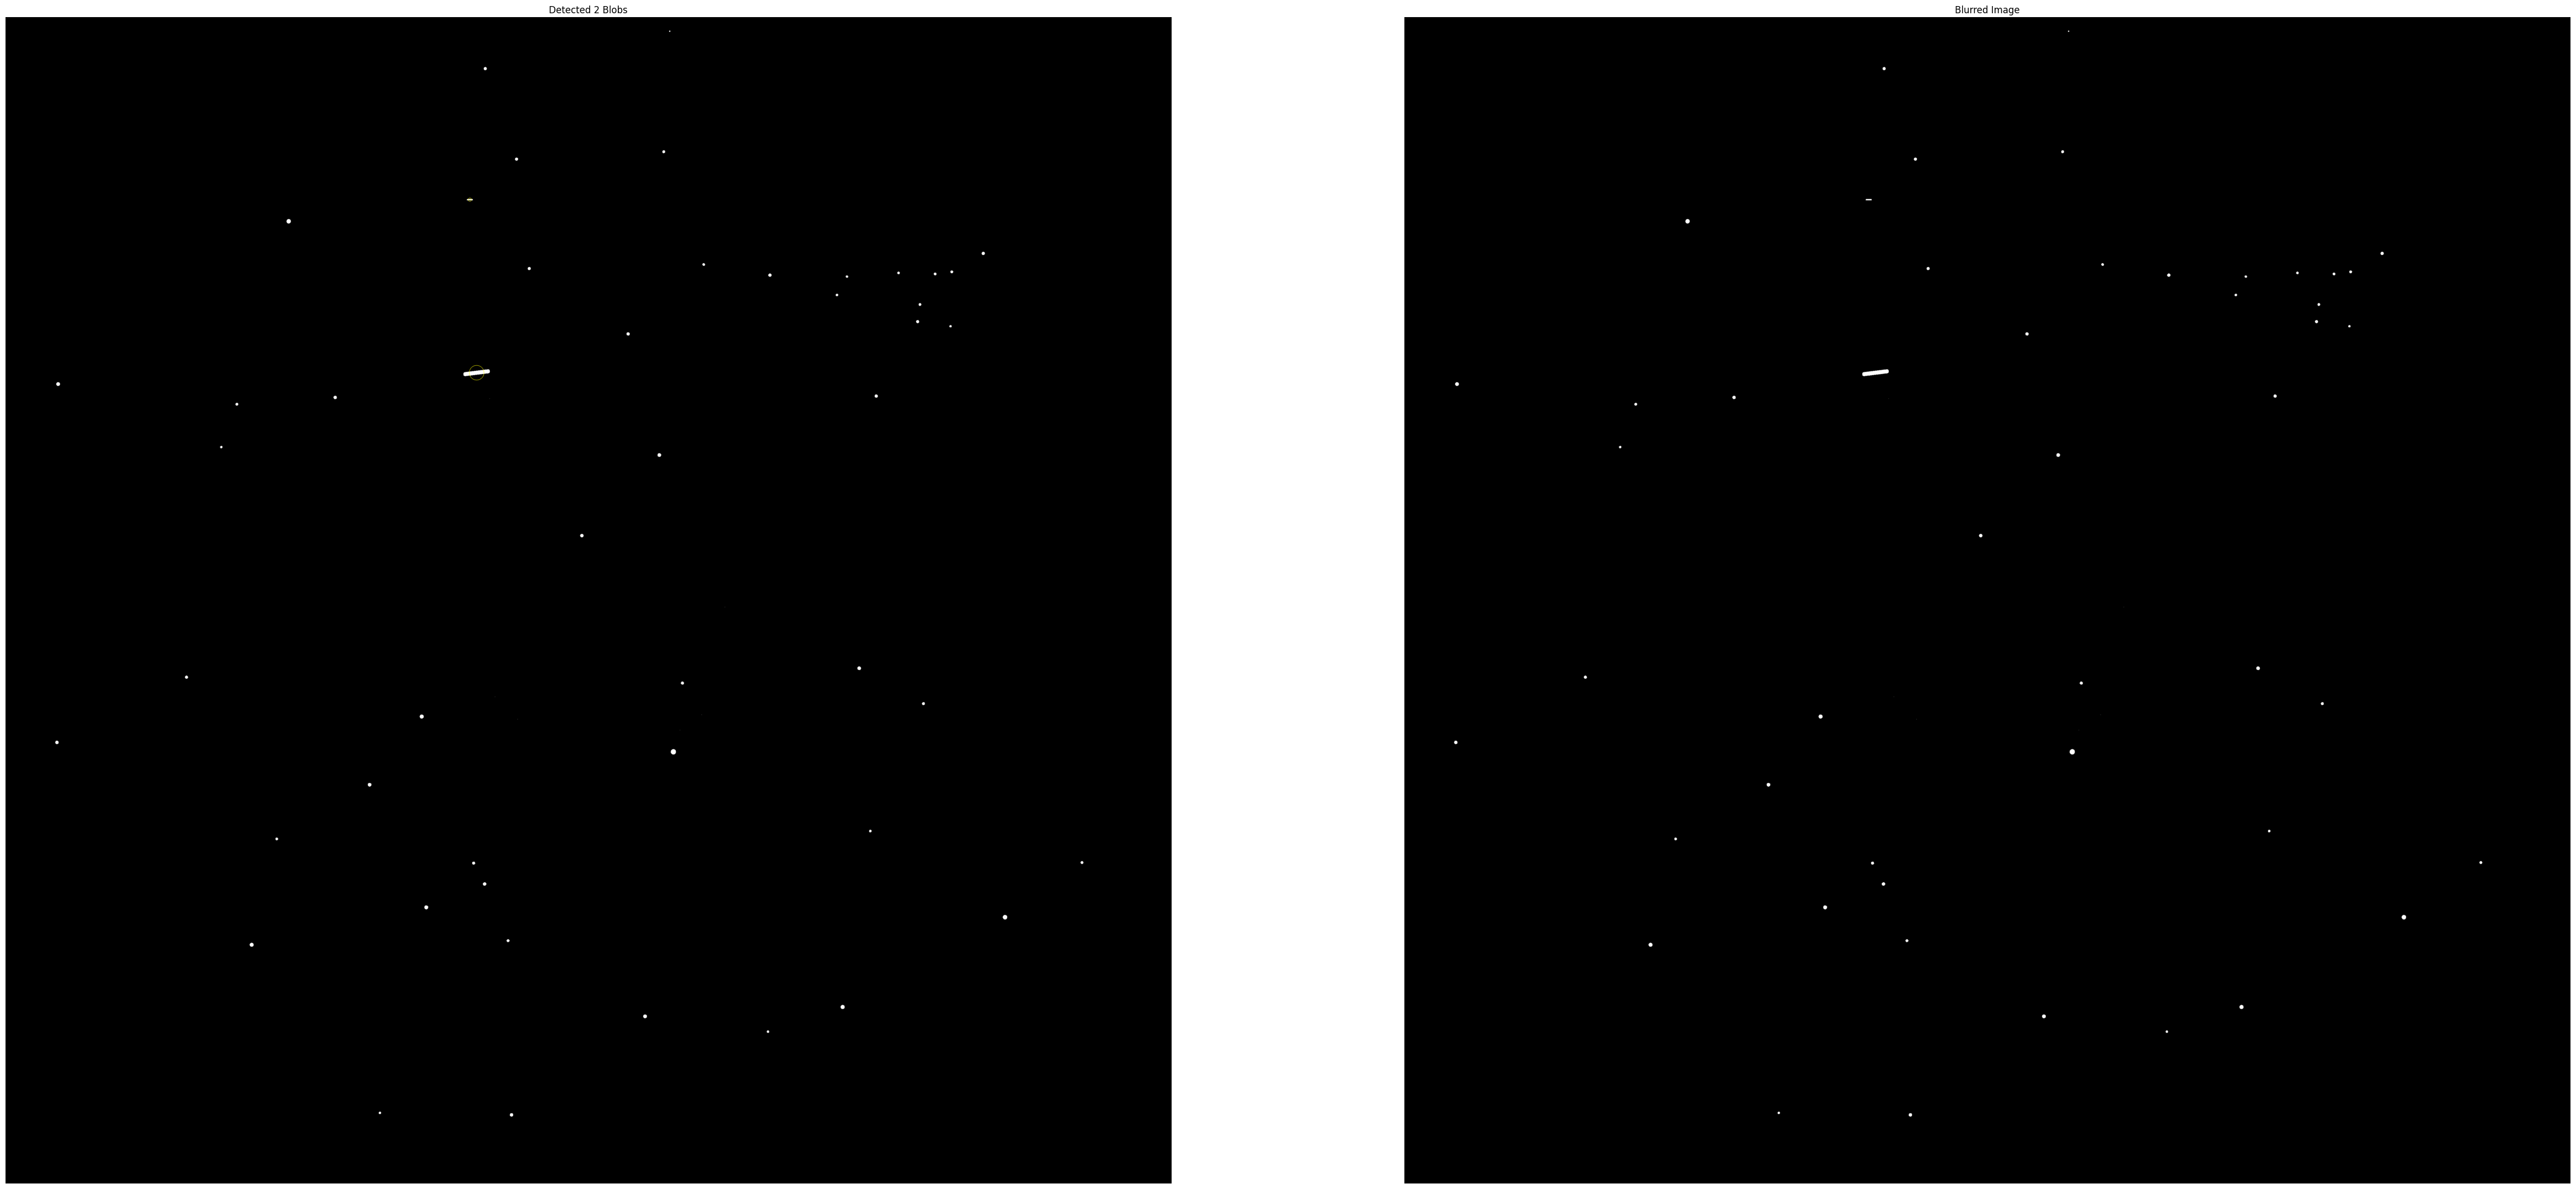

In [37]:
plt.figure(figsize=(60,30))
plt.subplot(1, 2, 1)
plt.imshow(img_with_keypoints, cmap='gray')
plt.title(f"Detected {len(streaks)} Blobs")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred, cmap='gray')
plt.title("Blurred Image")
plt.axis('off')

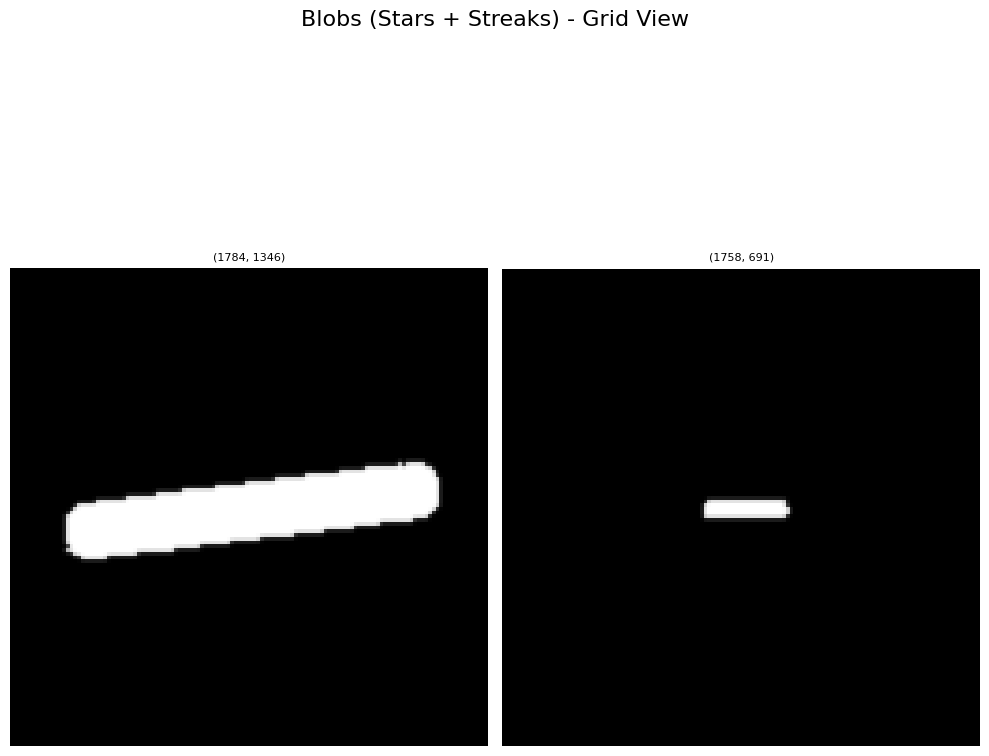

In [42]:

# visualizing streak blobs 
PATCH_SIZE = 128
patches = []
centers  = []
img = blurred
for kp in streaks:
    x, y = int(kp.pt[0]), int(kp.pt[1])
    half = PATCH_SIZE // 2

    # Boundary check
    if y - half < 0 or y + half > img.shape[0] or x - half < 0 or x + half > img.shape[1]:
        continue

    patch = img[y - half:y + half, x - half:x + half]
    patches.append(patch)
    centers.append((x, y))

# Show in grid
n = len(patches) 
cols = min(6, n)
rows = int(np.ceil(n / cols))

plt.figure(figsize=(10, 10))
for i in range(n):
    plt.subplot(rows, cols, i + 1)
    plt.title(f"({centers[i][0]}, {centers[i][1]})", fontsize=8)
    plt.imshow(patches[i], cmap='gray')
    plt.axis('off')
plt.suptitle("Blobs (Stars + Streaks) - Grid View", fontsize=16)
plt.tight_layout()
plt.show()